<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_7_Interpolation_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 7 
# Прикладная алгебра и численные методы
## Многочлены Чебышева

In [1]:
!python -m pip install sympy --upgrade

     |████████████████████████████████| 5.9MB 6.1MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [3]:
!python -m pip install -U matplotlib

     |████████████████████████████████| 11.5MB 6.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import numpy as np
import sympy
from sympy import S
from sympy.functions.special.polynomials import chebyshevt, chebyshevu
from numpy.polynomial.chebyshev import chebinterpolate
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
%matplotlib inline

In [2]:
import sympy
import numpy
sympy.__version__, numpy.__version__

('1.7.1', '1.19.5')

In [ ]:
sympy.init_printing(use_unicode=False, wrap_line=False, no_global=True)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Чебышева первого рода
$T_0(x) = 1$, $T_1(x) = x$, $T_(x) = 2xT_{n - 1}(x) - T_{n - 2}(x)$, $n\ge 2$.
## Задание 1
Построить графики многочленов Чебышева первого рода при $n = 1 - 5$, каждый график отдельным цветом, в легенду включить формулу многочлена в форме $T_1(x) = x$. 

!!! Использовать matplotlib, lambdify, Eq и многочлены Чебышева chebyshevt из Sympy !!!

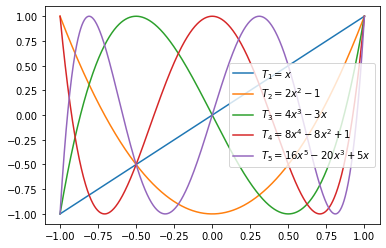

In [3]:
x = S('x')
X = np.linspace(-1, 1, 1001)
colors = ['red', 'green', 'blue', 'black', 'cian']
for k in range(1, 6):
    cheb_k = chebyshevt(k, x)
    plt.plot(X, sympy.lambdify(x, cheb_k)(X), label=sympy.latex(sympy.Eq(S('T{0}'.format(k)), cheb_k), mode='inline'))
plt.legend()

## Задание 2.
$$
T_n(x) = \frac{(x + \sqrt{x^2 - 1})^n + (x - \sqrt{x^2 - 1})^n}{2}, \quad |x| \ge 1.
$$
Построить многочлен Чебышева первого рода порядка 9, 11 и 13 по приведенной выше формуле и с помощью chebyshevt из Sympy.

Для каждого порядка 9, 11 и 13 на сетке значений $x$ от 5 до 6 с шагом 0.001 вычислить нормы 1 и 2 разностей значений многочлена Чебышева, полученного по формуле и с помощью chebyshevt.

Изобразить на отдельных графиках многочлены каждого порядка, полученные двумя способами (получится 3 графика)

Использовать plt.show() для изображения отдельного графика и plt.close для того, чтобы следующий график не содержал только что выведенного рисунка.

0.0005567669868469238 2.3623073604527974e-05


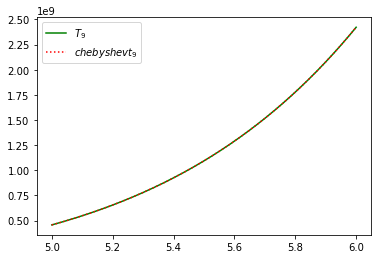

0.0854949951171875 0.0037126392929600514


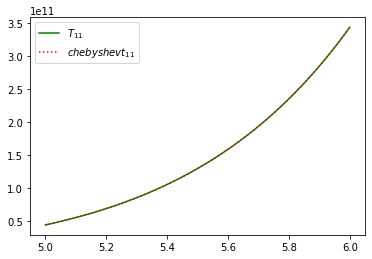

12.6875 0.5770075540560489


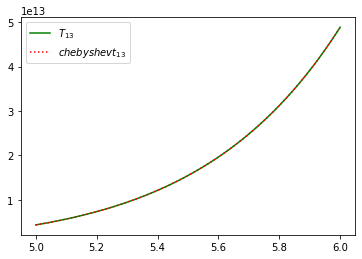

In [4]:
def T_new(n, x):
  return ((x + sympy.sqrt(x**2 - 1))**n + (x - sympy.sqrt(x**2 - 1))**n)/2

X = np.linspace(5, 6, 1001)
for k in (9, 11, 13):
    Y1 = sympy.lambdify(x, T_new(k, x))(X)
    Y2 = sympy.lambdify(x, chebyshevt(k, x))(X)
    print(*[np.linalg.norm(Y1 - Y2, k) for k in [1, 2]])
    plt.plot(X, Y1, 'g-', label=sympy.latex(S('T{0}'.format(k)), mode='inline'))
    plt.plot(X, Y2, 'r:', label=sympy.latex(S('chebyshevt{0}'.format(k)), mode='inline'))
    plt.legend()
    plt.show()
    plt.close

## Задание 3
Многочлен Чебышева второго рода:
$$
U_n = \frac{1}{n + 1}T'_{n + 1}(x), \quad n \ge 0.
$$
$$
U_n(x) = \frac{(x + \sqrt{x^2 - 1})^{n + 1} - (x - \sqrt{x^2 - 1})^{n + 1}}{2\sqrt{x^2 - 1}}, \quad |x| \ge 1.
$$

Построить многочлен Чебышева степени 10 по приведенным двум формулам, за основу в первой формуле взять chebyshevt из sympy.
Построить многочлен Чебышева степени 10 с помощью chebyshevu sympy.

При необходимости упростить полученные выражения и сравнить их.

In [5]:
def U1(n, x):
    return sympy.expand(chebyshevt(n + 1, x).diff(x)/(n + 1))
def U2(n, x):
    return sympy.expand(sympy.simplify(sympy.expand(((x + sympy.sqrt(x**2 - 1))**(n + 1) - (x - sympy.sqrt(x**2 - 1))**(n + 1)))/(2*sympy.sqrt(x**2 - 1))))

display(U1(10, x), U2(10, x), chebyshevu(10, x))    

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

1024*x**10 - 2304*x**8 + 1792*x**6 - 560*x**4 + 60*x**2 - 1

## Задание 4
Норма Чебышева (максимум модуля на данном отрезке):
$$
|f|_0 = \max_{[-1, 1]}|f(x)|.
$$
Площадь под графиком функции на данном отрезке:
$$
|f|_1 = \int_{-1}^1|f(x)|\,dx.
$$
Вычислить норму Чебышева и площадь под графиком для $\sin(\pi x)$ на отрезке [-1, 1].

In [6]:
x = S('x')

def f4(x):
    return sympy.sin(sympy.pi*x)

f4_norm0 = sympy.calculus.util.maximum(f4(x), x, domain=sympy.Interval(-1, 1))
f4_norm1 = sympy.Abs(f4(x)).integrate((x, -1, 1))
display('|f4|0 = {0} = {1}'.format(f4_norm0, round(f4_norm0, 3)),
        '|f4|1 = {0} = {1}'.format(f4_norm1, round(f4_norm1, 3)))  

'|f4|0 = 1 = 1'

'|f4|1 = 4/pi = 1.273'

## Задание 5
Наилучшее приближение функции $f(x)$ многочленом степени $\le n$:
$$
\tilde{f}(x) = \sum_{i=0}^n \frac{<T_i, f>}{<T_i, T_i>}T_i(x),
$$
$T_i(x)$ многочлен Чебышева первого рода степени $i$,
$$
<f, g> = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1 - x^2}}\,dx, \quad 
|f| = \sqrt{<f, f>} = \sqrt{\int_{-1}^1 \frac{f^2(x)}{\sqrt{1 - x^2}}\,dx}
$$

Построить с помощью Sympy и Numpy многочлен степени не выше 4, наилучшим образом приближающий $x^6 - x^2 + 2$ на [-1, 1]. 

Изобразить на общем графике $x^6 - x^2 + 2$ и приближения многочленами Чебышева, в легенду включить формулы.

Вычислить норму Чебышева и площадь между графиками функции и ее представления полиномами Чебышева.

In [9]:
x = S('x')
def f5(x):
    return x**6 - x**2 + 2

def dot_prod_cheb(f, g, x):
    return (f*g/sympy.sqrt(1 - x**2)).integrate((x, -1, 1))

def f_cheb(f, n, x):
    res = 0
    for k in range(n + 1):
        cheb_k = chebyshevt(k, x)
        coef = dot_prod_cheb(cheb_k, f, x)/dot_prod_cheb(cheb_k, cheb_k, x)
        res += coef*cheb_k
    return res   
res5 = f_cheb(f5(x), 4, x)   
display(res5)

3*x**4/2 - 25*x**2/16 + 65/32

In [10]:
res5n = chebinterpolate(f5, 4)
res5npoly = res5n[0]
for k in range(1, len(res5n)):
    res5npoly += res5n[k]*chebyshevt(k, x)
display(res5npoly)   

1.25*x**4 - 5.46637487322081e-16*x**3 - 1.3125*x**2 + 5.49308573246871e-16*x + 2.0

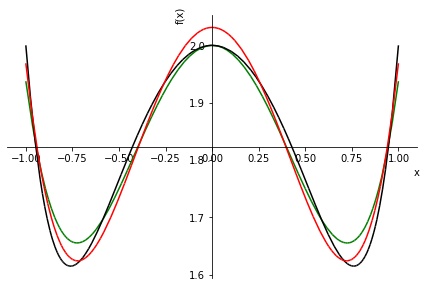

In [11]:
p = sympy.plot(res5npoly, (x, -1, 1), line_color='green', show=False)
p.extend(sympy.plot(f5(x), (x, -1, 1), line_color='black', show=False))
p.extend(sympy.plot(res5, (x, -1, 1), line_color='red', show=False))
p.show()

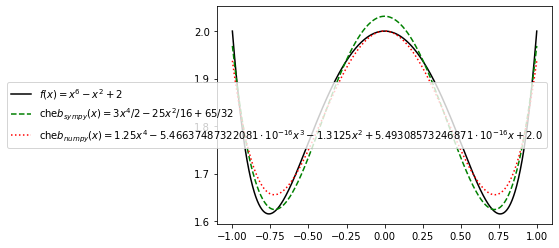

In [12]:
X = np.linspace(-1, 1, 1001)
Y = sympy.lambdify(x, f5(x))(X)
Y1 = sympy.lambdify(x, res5)(X)
Y2 = sympy.lambdify(x, res5npoly)(X)
plt.plot(X, Y, 'k-', label=sympy.latex(sympy.Eq(S('f(x)'), f5(x)), mode='inline'))
plt.plot(X, Y1, 'g--', label=sympy.latex(sympy.Eq(S('cheb_sympy(x)'), res5), mode='inline'))
plt.plot(X, Y2, 'r:', label=sympy.latex(sympy.Eq(S('cheb_numpy(x)'), res5npoly), mode='inline'))
plt.legend()

In [13]:
for item in (res5, res5npoly):
    display('|f5 - cheb|0 = {0}'.format(round(sympy.calculus.util.maximum(f5(x) - item, x, 
                                                                          domain=sympy.Interval(-1, 1)), 3)),
            '|f5 - cheb|1 = {0}'.format(round(sympy.Abs(f5(x) - item).integrate((x, -1, 1)), 3)))  

'|f5 - cheb|0 = 0.031'

'|f5 - cheb|1 = 0.040'

'|f5 - cheb|0 = 0.063'

'|f5 - cheb|1 = 0.040'